In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Gerekli kütüphanelerin import edilmesi ve çektiğimiz verilerin çekilmesi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import DropConstantFeatures

In [3]:
data = pd.read_csv("./data/extracted_data/general_data.csv")

In [4]:
data.shape

(3002, 2311)

In [5]:
data.describe()

,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,...,value__sum_values.230,value__median.230,value__mean.230,value__length.230,value__standard_deviation.230,value__variance.230,value__root_mean_square.230,value__maximum.230,value__absolute_maximum.230,value__minimum.230
count,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,...,3002.000000,3002.000000,3002.000000,3002.0,3002.0,3002.0,3002.000000,3002.000000,3002.000000,3002.000000
mean,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.983066,0.983066,0.983066,1.0,0.0,0.0,0.983066,0.983066,0.983066,0.983066
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222042,0.222042,0.222042,0.0,0.0,0.0,0.222042,0.222042,0.222042,0.222042
min,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.922238,0.922238,0.922238,1.0,0.0,0.0,0.922238,0.922238,0.922238,0.922238
50%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.987264,0.987264,0.987264,1.0,0.0,0.0,0.987264,0.987264,0.987264,0.987264
75%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.024176,1.024176,1.024176,1.0,0.0,0.0,1.024176,1.024176,1.024176,1.024176
max,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.026144,7.026144,7.026144,1.0,0.0,0.0,7.026144,7.026144,7.026144,7.026144


# Feature Selection

### Tüm değerleri 0 olan sütunlar

In [6]:
all_value_zero = []
for col in data.columns:
    if (data[col] == 0).all():
        all_value_zero.append(col)

In [7]:
len(all_value_zero)

469

Görüldüğü üzere veride bütün değerleri 0 olan sütunlar var. Bu sütunlardan ve varyansı bellir bir değerin altında kalan sütunlardan kurtulmak istiyorum

In [8]:
data.head()

,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,...,value__median.230,value__mean.230,value__length.230,value__standard_deviation.230,value__variance.230,value__root_mean_square.230,value__maximum.230,value__absolute_maximum.230,value__minimum.230,label
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.005460,1.005460,1.0,0.0,0.0,1.005460,1.005460,1.005460,1.005460,f
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.003324,1.003324,1.0,0.0,0.0,1.003324,1.003324,1.003324,1.003324,f
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.912718,0.912718,1.0,0.0,0.0,0.912718,0.912718,0.912718,0.912718,f
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992674,0.992674,1.0,0.0,0.0,0.992674,0.992674,0.992674,0.992674,f
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.047844,1.047844,1.0,0.0,0.0,1.047844,1.047844,1.047844,1.047844,f


Verimizdeki hedef değişkenimiz "label" sütunudur. Bu sütunda 3 farklı sınıf bulunmaktadır ve bunları kodlamak istiyorum. Bunun için `LabelEncoder` kullanarak sınıfları kodladım. Daha sonra, veriyi bağımsız değişkenler (x) ve bağımlı değişken (y) olarak ayırdım.


In [9]:
label_encoder = LabelEncoder()

# Splitting data into features and target
x = data.drop(columns="label")
y = label_encoder.fit_transform(data["label"])

In [10]:
x.shape

(3002, 2310)

`DropConstantFeatures` sınıfını kullanarak, veri kümesindeki sabit özellikleri (varyansı belirli bir eşik değerinden düşük olanları) kaldırmak için bir seçici oluşturdum. Eşik değeri olarak 0.85'i tercih ettim. Bu seçiciyi, veri kümesini dönüştürmek için `fit()` ve `transform()` fonksiyonlarıyla uygun hale getirdim. Son olarak, orijinal veri kümesini (`x`) bu seçiciyle dönüştürdüm ve sadece seçilen özellikleri içeren bir DataFrame'e atadım.

In [11]:
selector = DropConstantFeatures(tol=0.85)
selector.fit(x)
selector.transform(x)
x = x.loc[:, selector.get_support()]

DropConstantFeatures(tol=0.85)

,value__sum_values.1,value__median.1,value__mean.1,value__root_mean_square.1,value__maximum.1,value__absolute_maximum.1,value__minimum.1,value__sum_values.2,value__median.2,value__mean.2,...,value__maximum.229,value__absolute_maximum.229,value__minimum.229,value__sum_values.230,value__median.230,value__mean.230,value__root_mean_square.230,value__maximum.230,value__absolute_maximum.230,value__minimum.230
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.009183,1.009183,1.009183,1.005460,1.005460,1.005460,1.005460,1.005460,1.005460,1.005460
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.002857,1.002857,1.002857,1.003324,1.003324,1.003324,1.003324,1.003324,1.003324,1.003324
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.833680,0.833680,0.833680,0.912718,0.912718,0.912718,0.912718,0.912718,0.912718,0.912718
3,0.990132,0.990132,0.990132,0.990132,0.990132,0.990132,0.990132,1.006644,1.006644,1.006644,...,1.003676,1.003676,1.003676,0.992674,0.992674,0.992674,0.992674,0.992674,0.992674,0.992674
4,1.064830,1.064830,1.064830,1.064830,1.064830,1.064830,1.064830,1.002552,1.002552,1.002552,...,0.969081,0.969081,0.969081,1.047844,1.047844,1.047844,1.047844,1.047844,1.047844,1.047844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.264237,1.264237,1.264237,1.018018,1.018018,1.018018,1.018018,1.018018,1.018018,1.018018
2998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.044888,1.044888,1.044888,0.954057,0.954057,0.954057,0.954057,0.954057,0.954057,0.954057
2999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.094722,1.094722,1.094722,0.932560,0.932560,0.932560,0.932560,0.932560,0.932560,0.932560
3000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.026732,1.026732,1.026732,0.801876,0.801876,0.801876,0.801876,0.801876,0.801876,0.801876


In [12]:
x.shape

(3002, 1610)

Yukarıdaki işlemden sonra verinin kolonlarını her ne kadar düşürmeyi başarsamda bu sasyı hala yüksek. Dolayısıyla `DropDuplicateFeatures` kullanarak veri kümesindeki yinelenen özellikleri kaldırmak istedim.

In [13]:
selector = DropDuplicateFeatures()
selector.fit(x)
selector.transform(x)
x = x.loc[:, selector.get_support()]

DropDuplicateFeatures()

,value__sum_values.1,value__sum_values.2,value__sum_values.3,value__sum_values.4,value__sum_values.5,value__sum_values.6,value__sum_values.7,value__sum_values.8,value__sum_values.9,value__sum_values.10,...,value__sum_values.221,value__sum_values.222,value__sum_values.223,value__sum_values.224,value__sum_values.225,value__sum_values.226,value__sum_values.227,value__sum_values.228,value__sum_values.229,value__sum_values.230
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.019512,1.011483,0.996216,1.016144,1.000000,1.007477,0.999072,1.011142,1.009183,1.005460
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.003447,1.003925,1.003910,1.002921,1.006796,1.006750,1.005747,1.002857,1.003324
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.576190,0.766684,0.195915,0.817536,0.888406,0.904078,1.269939,1.161836,0.833680,0.912718
3,0.990132,1.006644,0.986799,1.003345,1.000000,1.000000,0.950000,1.031579,1.000000,0.870748,...,0.901869,0.948187,1.109290,0.950739,0.891192,1.133721,1.256410,1.110204,1.003676,0.992674
4,1.064830,1.002552,0.953128,1.022968,1.029516,0.974112,0.985657,1.082090,1.106165,1.044848,...,0.924935,1.000933,0.980532,0.979981,0.946623,1.030851,1.071848,1.081212,0.969081,1.047844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.970874,1.150000,0.904348,0.845192,0.733788,0.996899,1.353033,1.009195,1.264237,1.018018
2998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.026688,1.007089,0.704732,0.910100,0.790244,1.108796,1.286708,0.867496,1.044888,0.954057
2999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.011172,1.080583,0.968371,0.984654,0.857592,1.130877,1.060150,0.898484,1.094722,0.932560
3000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.079864,1.096241,0.973002,0.997052,1.019924,1.244754,1.121652,1.063685,1.026732,0.801876


In [14]:
x.shape

(3002, 231)

Bu kod bloğu, veri ölçeklendirme ve `PCA` (Principal Component Analysis) işlemlerini içerir.

- Öncelikle, veriyi standartlaştırmak için `StandardScaler()` kullanılarak özellikler ölçeklendirilir.
- Ardından, PCA uygulanır ve her bir bileşenin varyansını ifade eden kümülatif varyans açıklama oranını hesaplar.
- Son olarak, kümülatif varyans açıklama oranını görselleştirir ve bileşen sayısının artışıyla birlikte açıklanan toplam varyansın nasıl değiştiğini gösterir.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Cumulative Variance Explained by PCA Components')

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Variance Explained')

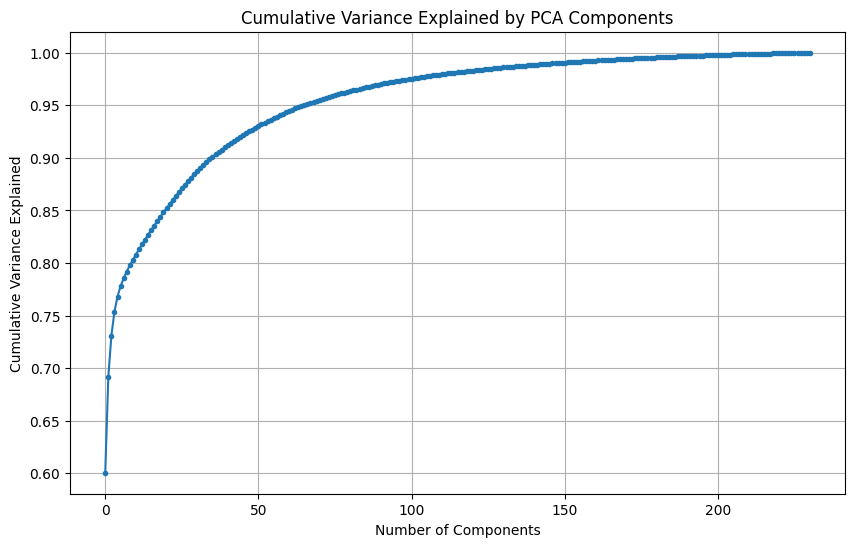

In [15]:
scaler = StandardScaler()
x_scaled =  scaler.fit_transform(x)

pca = PCA()
X_train_pca = pca.fit_transform(x_scaled)

# Kümülatif varyans açıklama oranını hesaplayalım
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Grafik oluşturalım
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='.', linestyle='-')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

Yukarda grafikte görüldüğü üzere `180` civarında kümülatif toplam 1 oluyor.

In [16]:
# PCA
pca = PCA(n_components=180)
X_pca = pca.fit_transform(x_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=[f"PCA{i}" for i in range(X_pca.shape[1])])

Bunlarında ardından verimizin boyut olarak hala büyük olduğunu düşündüğüm için `RandomForestClassifier`'ı  kullanarak `Recursive Feature Elimination` yöntemiyle öznitelik seçimi yaptım

RFE, veri kümesindeki öznitelikleri sıralayarak, en önemli öznitelikleri belirler ve ardından modelin performansını değerlendirir. RandomForestClassifier, bu seçim sürecinde kullanılan temel modeldir. 

Sonuç olarak, X_pca_df veri kümesinden seçilen öznitelikler X_rfe olarak adlandırılan yeni bir dataframe'e atadım.

In [17]:
selector = RFE(
    RandomForestClassifier(random_state=10))

selector.fit(X_pca_df, y)

X_rfe=selector.transform(X_pca_df)

RFE(estimator=RandomForestClassifier(random_state=10))

In [18]:
X_rfe.shape

(3002, 90)

Tüm bu işlemlerden sonra işlenmiş veriyi `model.ipynb` dosyasında işlemek için kaydettim.

In [19]:
data_X = pd.DataFrame(X_rfe, columns=[f"RFE{i}" for i in range(X_rfe.shape[1])])

# y_train ve y_test Serilerini birleştirme
y = pd.Series(y)

# Indexleri sıfırlama
data_X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# data_X ve y'yi birleştirme
data = pd.concat([data_X, y], axis=1)

# # Sütun adlarını ayarlama
data["label"] = data[0]
data.drop(columns=0, inplace=True)

# data_X ve y'yi CSV dosyasına yazma
data.to_csv("./data/selected_data/data.csv", index=False)

In [20]:
data.head()

,RFE0,RFE1,RFE2,RFE3,RFE4,RFE5,RFE6,RFE7,RFE8,RFE9,...,RFE81,RFE82,RFE83,RFE84,RFE85,RFE86,RFE87,RFE88,RFE89,label
0,-12.078720,-3.605630,-1.027721,2.411680,-2.050173,-1.686073,-0.238107,-1.456977,0.198971,0.270142,...,-0.041701,0.005467,0.025711,0.003867,-0.017866,-0.016562,-0.002606,0.011219,0.013006,0
1,-13.240624,-7.081787,8.316617,-2.925242,1.088351,0.574426,0.605973,1.179106,-0.325205,-1.971749,...,-0.023159,-0.045061,0.012397,-0.039785,-0.015060,-0.016828,0.016548,0.019429,0.017479,0
2,-12.432056,-4.322313,0.477359,2.056993,-2.175265,-3.062411,1.314699,-0.094053,0.327897,2.446549,...,0.036727,-0.007911,-0.022037,0.056180,0.009406,0.041794,-0.037050,-0.008399,-0.035462,0
3,15.039435,-2.350364,-0.798714,-0.595493,-0.249927,0.134193,0.431117,0.074488,-0.113339,-0.190189,...,0.043162,0.362970,-0.107082,-0.015670,0.085427,0.053496,-0.185140,0.008069,-0.444741,0
4,15.044271,-2.172897,-0.708620,-0.799835,-0.604867,0.426073,0.556432,-0.205141,0.084899,-0.343460,...,-0.176727,0.050583,-0.045376,0.024044,0.027605,0.167033,-0.224882,0.183961,-0.060441,0


In [21]:
corrmat=data.corr(method='kendall')
corrmat

,RFE0,RFE1,RFE2,RFE3,RFE4,RFE5,RFE6,RFE7,RFE8,RFE9,...,RFE81,RFE82,RFE83,RFE84,RFE85,RFE86,RFE87,RFE88,RFE89,label
RFE0,1.000000,0.224744,-0.006142,-0.105060,0.010829,0.001610,0.042592,0.000301,-0.026977,-0.027653,...,0.011132,-0.022960,0.002208,-0.011868,-0.003842,-0.029412,0.014484,0.017948,0.009996,0.014376
RFE1,0.224744,1.000000,-0.082039,-0.028127,0.200414,0.093065,-0.030343,0.082950,-0.142119,-0.006756,...,-0.012859,-0.017414,0.007559,-0.008013,0.000518,-0.003176,0.009393,0.000992,-0.005888,0.089756
RFE2,-0.006142,-0.082039,1.000000,0.017645,-0.155777,-0.109029,0.015856,0.058277,-0.022546,0.078412,...,-0.003272,0.006161,-0.008065,-0.004345,-0.003333,0.004240,0.017059,-0.003985,-0.004453,-0.054487
RFE3,-0.105060,-0.028127,0.017645,1.000000,-0.131856,0.038707,-0.085619,-0.041046,-0.000056,0.021388,...,-0.015930,0.025310,0.014575,0.000111,0.015860,-0.003672,-0.003734,0.004357,0.008660,-0.034645
RFE4,0.010829,0.200414,-0.155777,-0.131856,1.000000,0.097116,0.062590,0.036254,-0.142919,-0.057092,...,-0.015041,-0.001746,0.007763,-0.020301,-0.014376,-0.010030,0.006078,0.012256,-0.009976,0.066548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RFE86,-0.029412,-0.003176,0.004240,-0.003672,-0.010030,-0.006975,0.005302,-0.010166,0.033194,0.011984,...,-0.053749,-0.050189,-0.024202,0.017787,-0.011307,1.000000,-0.016840,-0.058208,-0.046920,-0.041579
RFE87,0.014484,0.009393,0.017059,-0.003734,0.006078,-0.010306,0.010211,0.024205,-0.046709,-0.003965,...,0.051499,0.032292,-0.010176,0.010480,0.029550,-0.016840,1.000000,0.002543,-0.028054,-0.048095
RFE88,0.017948,0.000992,-0.003985,0.004357,0.012256,-0.014069,0.000027,-0.001282,0.005816,-0.005382,...,0.032248,-0.037642,0.007554,0.031656,-0.054367,-0.058208,0.002543,1.000000,0.008512,0.002786
RFE89,0.009996,-0.005888,-0.004453,0.008660,-0.009976,0.001774,0.010589,0.008576,-0.006414,-0.017427,...,-0.029042,-0.058266,0.038709,0.020127,0.007698,-0.046920,-0.028054,0.008512,1.000000,0.037057


# Verinin son haline görselleri ve dağılımları görmek için `sweetviz` kütüphanesini kullandım
Sonucu `./outputs/report.html` dosyasında görebilirsiniz.

In [ ]:
import sweetviz as sv

report = sv.analyze(data, pairwise_analysis='on')

report.show_html("./outputs/report.html")

# Outlier

Burada amacım veride standart sapmaya göre outlier olarak görünen verilerin modeldeki karşılığını anlamaktır. Yani modeli oluşturduktan sonra modelin outlier olarak bulduğumuz veriler üzerindeki başarımını anlamak için outlierları bulmak istedim.

In [23]:
df = pd.read_csv("./data/selected_data/data.csv")

In [24]:
df.head()

,RFE0,RFE1,RFE2,RFE3,RFE4,RFE5,RFE6,RFE7,RFE8,RFE9,...,RFE81,RFE82,RFE83,RFE84,RFE85,RFE86,RFE87,RFE88,RFE89,label
0,-12.078720,-3.605630,-1.027721,2.411680,-2.050173,-1.686073,-0.238107,-1.456977,0.198971,0.270142,...,-0.041701,0.005467,0.025711,0.003867,-0.017866,-0.016562,-0.002606,0.011219,0.013006,0
1,-13.240624,-7.081787,8.316617,-2.925242,1.088351,0.574426,0.605973,1.179106,-0.325205,-1.971749,...,-0.023159,-0.045061,0.012397,-0.039785,-0.015060,-0.016828,0.016548,0.019429,0.017479,0
2,-12.432056,-4.322313,0.477359,2.056993,-2.175265,-3.062411,1.314699,-0.094053,0.327897,2.446549,...,0.036727,-0.007911,-0.022037,0.056180,0.009406,0.041794,-0.037050,-0.008399,-0.035462,0
3,15.039435,-2.350364,-0.798714,-0.595493,-0.249927,0.134193,0.431117,0.074488,-0.113339,-0.190189,...,0.043162,0.362970,-0.107082,-0.015670,0.085427,0.053496,-0.185140,0.008069,-0.444741,0
4,15.044271,-2.172897,-0.708620,-0.799835,-0.604867,0.426073,0.556432,-0.205141,0.084899,-0.343460,...,-0.176727,0.050583,-0.045376,0.024044,0.027605,0.167033,-0.224882,0.183961,-0.060441,0


In [25]:
df.shape

(3002, 91)

In [26]:
etiket_sayilari = df["label"].value_counts()

print(etiket_sayilari)

label
1    1217
0     998
2     787
Name: count, dtype: int64


In [27]:
labels = {0: 'f', 1: 'h', 2: 't'}

df['label'] = df['label'].map(labels)

Outlierları tespit etme sürecinde, belirlediğim standart sapma eşiği dışındaki değerleri outlier olarak tanımlıyorum. Bu işlemi gerçekleştirirken veriyi etiketlerine göre gruplara ayırıyor ve her bir özellik sütunu için ayrı ayrı inceliyorum. Bu yöntemle outlier değerlerini buluyorum.

In [28]:
def outliers(df, num_col_name, target, std1=3, std2=3):

    dict = {}
    outlier_indices = []

    for label in df[target].unique():
        selected_label = df[df[target] == label]
        selected_col = selected_label[num_col_name]

        std = selected_col.std()
        avg = selected_col.mean()

        three_sigma_plus = avg + (std1 * std)
        three_sigma_minus = avg - (std2 * std)

        outlier_count = (selected_label[num_col_name] > three_sigma_plus).sum() + (selected_label[num_col_name]< three_sigma_minus).sum()
        dict.update({label: outlier_count})

        outliers = selected_label[(selected_col > three_sigma_plus) | (selected_col < three_sigma_minus)]
        outlier_indices.extend(outliers.index.tolist())
    print(f"\n{num_col_name} Kolonundaki sektörlere göre outlier sayısı : ")
    print(dict)
    print(f"{num_col_name} Kolonundaki toplam outlier sayısı : {sum(list(dict.values()))}")
    print("##############################\n")
    return outlier_indices

In [29]:
num_cols = df.drop(columns="label")

In [30]:
indices = []

for col in num_cols.columns:
    indices.extend(outliers(df, col, "label", std1=3.9, std2=3.9))
indices = set(indices)
print(f"outlier sayısı {len(indices)} ")


RFE0 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 0, 'h': 0, 't': 0}
RFE0 Kolonundaki toplam outlier sayısı : 0
##############################


RFE1 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 0, 'h': 0, 't': 0}
RFE1 Kolonundaki toplam outlier sayısı : 0
##############################


RFE2 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 0, 'h': 0, 't': 0}
RFE2 Kolonundaki toplam outlier sayısı : 0
##############################




RFE3 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 0, 'h': 0, 't': 0}
RFE3 Kolonundaki toplam outlier sayısı : 0
##############################


RFE4 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 1, 'h': 0, 't': 0}
RFE4 Kolonundaki toplam outlier sayısı : 1
##############################


RFE5 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 2, 'h': 1, 't': 1}
RFE5 Kolonundaki toplam outlier sayısı : 4
##############################


RFE6 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 2, 'h': 2, 't': 5}
RFE6 Kolonundaki toplam outlier sayısı : 9
##############################


RFE7 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 2, 'h': 6, 't': 3}
RFE7 Kolonundaki toplam outlier sayısı : 11
##############################


RFE8 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 1, 'h': 4, 't': 3}
RFE8 Kolonundaki toplam outlier sayısı : 8
##############################


RFE9 Kolonundaki sektörlere göre outlier sayısı : 
{'f': 2, 'h': 8, 't': 6}
RFE9 Kolon

In [31]:
df = pd.DataFrame(list(indices), columns=['Outlier_indeksler'])

In [32]:
df.to_csv("./data/selected_data/outlier_indices.csv", index=False)